# Sentiment Analysis of Product reviews

Name : Raguath Gunasekaran

## Introduction

Sentiment analysis, which is also known as opinion mining, studies people’s sentiments towards certain entities. [Ref 1]

In recent days, Sentiment analysis has gain much attention  Sentiment analysis or opinion mining is one of the major tasks of NLP (Natural Language Processing) and Machine Learning. 
It's used to determine whether the given product review is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer need [ Ref 3 ]

Business Sucess, The Product Owner should understand the customers mindset and their opinion. Sentiment analysis is extremely important to understand the customer mindset because it helps businesses quickly understand the overall opinions of their customers. 
By automatically sorting the sentiment behind reviews, social media conversations. once we understand the sentiment, Product owner can react to solve the issue or enhance the features of the product to attract the customer. [ Ref 3 ]

Python as a programming language has numerous uses such as Machine Learning, AI, mobile applications, statistical , etc. As we know, AI, machine learning, and data analysis/analytics is where it has amassed most of its popularity. 
Python contains more libraries and packages is continually being employed which helped to solve complex industry issues, data-driven strategies, risk analysis etc.

## Business Understanding: Defining the Problem

The business objective remained the same: The main goal of the project is to build a sentiment analysis predictive model to predict or determine to determined whether the product is satisying the customer or not. 
I am going to use different classification machine learning algorithms to get more accurate predictions through NLP.

Defining the Target Variable : The Target variable is going to be target class. The Review prediction is going to be Positive, Negative or Netural and Review Text and Recommended IND  variable as a predictor

## Data Understanding

Data used in this project are online product reviews collected from Kaggle.com ( Women’s Clothing E-Commerce dataset )
https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

The format of the dataset for this case study is CSV. The data contains below variables.
Pandas library used to load the data from csv to Dataframe.

Clothing ID: The specific Clothing being reviewed.

Age: Age of the Reviewer.

Title: Review Titla.

Review Text: detail content of the Product Review.

Rating: Score from 1 Worst, to 5 Best.

Recommended IND: Customer recommends the product or not

Positive Feedback Count: Number of other customers who found this review positive.

Division Name: Product high level division.

Department Name: Product department name.

Class Name: Product class name.


## Data Preparation
Based on the reading, “data scientists usually spend 70% of the project time here, preprocessing and exploring the data”. So, the Data Preparation is important for predictive analytics project. In this project, we need to make sure the data is suitable and well prepared for model. While preparing the Data, we need to verify the metadata of the given dataset and need to understand very clearly about data patterns, relationships etc


### Importing packages and loading data

In [3]:
# data processing
import pandas as pd

# linear algebra
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Word Processing
import re
import string

#nltk for Text preprocessing 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [6]:
ProductReview_df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', header=0,index_col=0)
ProductReview_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


####  Metadata of the Dataframe

In [7]:
ProductReview_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [8]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ")
ProductReview_df.shape

The dimension of the table is: 


(23486, 10)

#### Summarized Data

In [10]:
print("Describe Data")
print(ProductReview_df.describe())
print("Summarized Data")
print(ProductReview_df.describe(include=['O']))

Describe Data
        Clothing ID           Age        Rating  Recommended IND  \
count  23486.000000  23486.000000  23486.000000     23486.000000   
mean     918.118709     43.198544      4.196032         0.822362   
std      203.298980     12.279544      1.110031         0.382216   
min        0.000000     18.000000      1.000000         0.000000   
25%      861.000000     34.000000      4.000000         1.000000   
50%      936.000000     41.000000      5.000000         1.000000   
75%     1078.000000     52.000000      5.000000         1.000000   
max     1205.000000     99.000000      5.000000         1.000000   

       Positive Feedback Count  
count             23486.000000  
mean                  2.535936  
std                   5.702202  
min                   0.000000  
25%                   0.000000  
50%                   1.000000  
75%                   3.000000  
max                 122.000000  
Summarized Data
           Title                                        Revi

####  Checking Nulls and Renaming the column names

In [11]:
ProductReview_df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [15]:
ProductReview_df = ProductReview_df.rename(columns={"Recommended IND": "Recommended", "Review Text": "Review"})
ProductReview_df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


####  identify the Correlation between Variables

In [18]:
ProductReview_df.corr()

,Clothing ID,Age,Rating,Recommended,Positive Feedback Count
Clothing ID,1.000000,0.017972,-0.018879,-0.016206,0.046356
Age,0.017972,1.000000,0.026831,0.030622,0.043079
Rating,-0.018879,0.026831,1.000000,0.792336,-0.064961
Recommended,-0.016206,0.030622,0.792336,1.000000,-0.069045
Positive Feedback Count,0.046356,0.043079,-0.064961,-0.069045,1.000000


#### Recommended Product Review - Analysis

Text(0.5, 1.0, 'Recommendation Analysis')

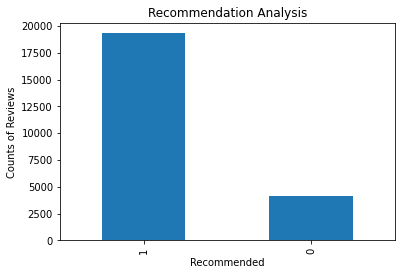

In [17]:
ProductReview_df["Recommended"].value_counts().plot(kind='bar')
plt.xlabel("Recommended")
plt.ylabel("Counts of Reviews")
plt.title("Recommendation Analysis")

Text(0.5, 1.0, 'Rating Analysis')

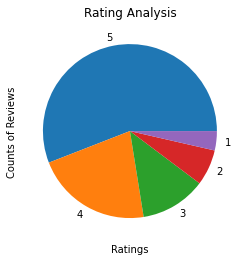

In [25]:
ProductReview_df["Rating"].value_counts().plot(kind='pie')
plt.xlabel("Ratings")
plt.ylabel("Counts of Reviews")
plt.title("Rating Analysis")

Text(0.5, 1.0, 'Class Name Analysis')

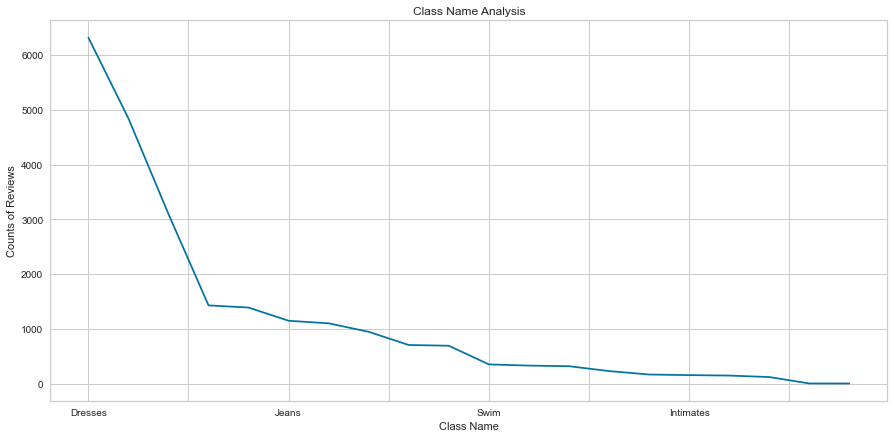

In [37]:
ProductReview_df["Class Name"].value_counts().plot(kind='line')
plt.xlabel("Class Name")
plt.ylabel("Counts of Reviews")
plt.title("Class Name Analysis")

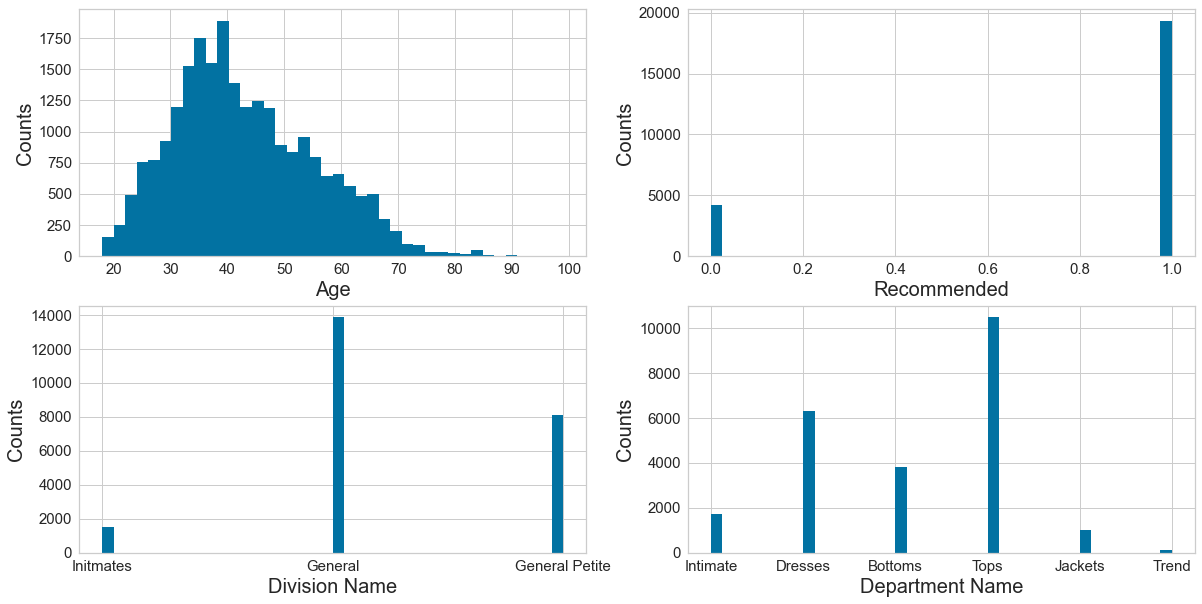

In [38]:
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'Recommended', 'Division Name', 'Department Name']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(ProductReview_df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
#plt.show()

<AxesSubplot:xlabel='Department Name', ylabel='Positive Feedback Count'>

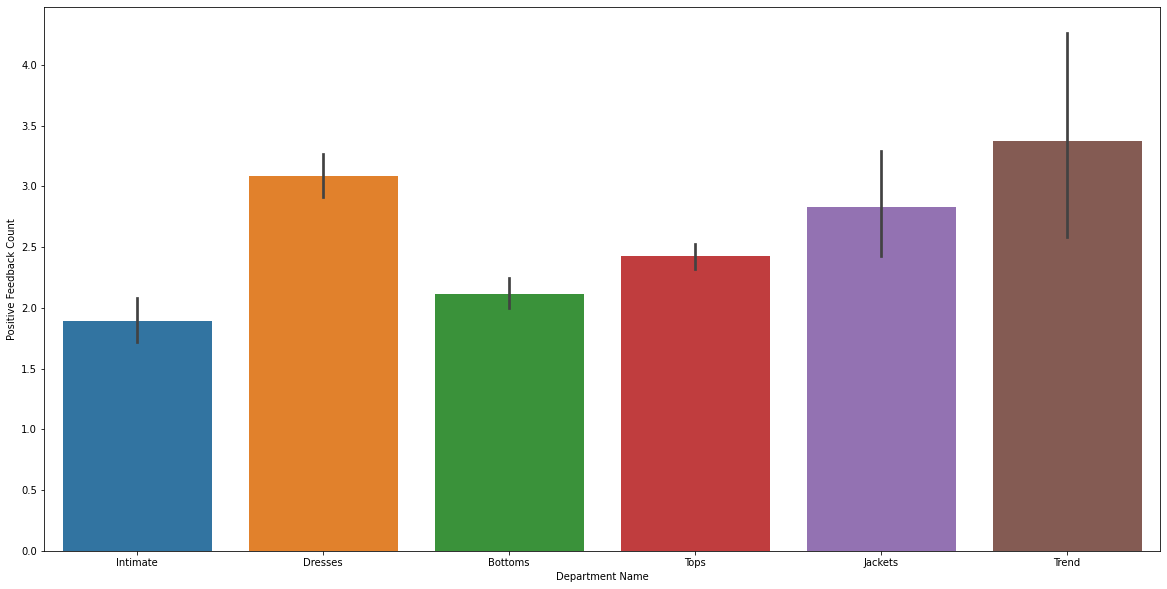

In [29]:
sns.barplot(x='Department Name', y='Positive Feedback Count', data=ProductReview_df)

## Milestone 1 - Conclusion

1. The product received more recommendation from Customers
2. Most of the Customer provided Rating 5 for Products
3. In the Dress Class Name received more Recommentation and Reviews
4. Customers from Age 30 to 40 are participated much in Reviews
5. Tops from Depart Name received more Reviews

##  Next Steps

1. Exploratory Data Analysis (EDA)

We need to perform EDA and that data needs to be cleaned to gain insights that may be useful in improving the performance of our model. Few of the EDA as follows
•	Filling missing information (Null / NA values)
•	Encoding of categorical variables
•	Dropping of features (or columns) 

 
2. Text preprocessing

The below are steps we need to follow for the text preprocessing through Natural Language Tool Kit (NLTK)
Lowercase
Removing Punctuation
Tokenization
Stopword Filtering
Stemming


3. Models

I am going to use the following classification models and perform the 

Logistic Regression
Naive Bayes
Support Vector Machine
Random Forest

4.Performace Evaluation Metrics

Accuracy: test’s ability to correctly predict both classes
Precision: test’s ability to correctly detect positive classes from all predicted positive classes
Recall (Sensitivity): test’s ability to correctly detect positive classes from all actual positive classes
F1 Score: harmonic mean of precision and recall


5. Deployment


6. Conculsion and Summary of the Project
    

## References

1.  Sentiment analysis using product review data, Journel of Big Data
        https://journalofbigdata.springeropen.com/articles/10.1186/s40537-015-0015-2
        
2.  Sentiment Analysis, Wikipedia
        https://en.wikipedia.org/wiki/Sentiment_analysis.

3.  Sentiment Analysis: A Definitive Guide, MonkeyLearn

        https://monkeylearn.com/sentiment-analysis/
        
4.  https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

5. https://www.zentut.com/data-mining/data-mining-processes/
